<a href="https://colab.research.google.com/github/gleangphibul/Spotify_Data_Analysis/blob/main/spotify_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup (Can Ignore)**

In [1]:
# Install necessary packages

!pip install matplotlib

!pip install squarify

In [49]:
# Import the packages

from google.colab import drive # To access files stored on google drive

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify # for tree map

# Common data science/dataframe manipulation packages
import pandas as pd
import numpy as np

In [3]:
# Mount to Google Drive (gives code access to files in Google Drive)

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set the folder path
folder_path = '/content/drive/My Drive/DataScience_Projects/spotify_data_project'

# **Analyzing Stream Performance**

The first part is analyzing streaming performance on Spotify's platform compared to other competitor platforms such as Youtube, radio (airplay sins), and SiriusXM radio. Performance is viewed per artist to inform partnership strategy which are with artists, not songs.

**Recommendation Summary:**

Although Spotify has on averaged outperformed its competitors in terms of streaming, one of its top artists, Ed Sheeran has been performing much stronger on Youtube. To retain a powerful fanbase and consequently a strong source of support and revenue, strategy should prioritize promotional campaigns and partnership with Ed Sheeran. In addition, 10 other artists who perform especially weak on Spotify compared to Youtube have also been identified as areas of improvement.

A potential suggestion is to prioritize adding music videos onto spotify tracks for these particular artists to diminish one of Youtube's strongest selling points.


In [7]:
platform_streams = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/artist_streams_platforms.csv')

platform_streams.head(10)

,artist,total_spotify_streams,total_youtube_views,total_airplay_spins,total_siriusxm_spins
0,Post Malone,19414279709,11457733942,3722615,7027
1,The Weeknd,18701814442,11364659196,2305177,2406
2,Bad Bunny,16645582535,12043510651,960821,2632
3,Imagine Dragons,15770756681,14686169319,1706129,4273
4,Ed Sheeran,14915963567,19241735782,4078526,3810
5,Drake,14842235606,5582180626,621035,4998
6,Justin Bieber,10470062458,10450068745,2792732,5236
7,Harry Styles,10172423035,4345444824,4116120,8559
8,Ariana Grande,10077704169,8970126153,1762583,2944
9,Doja Cat,9919136034,4162945738,2628314,11808


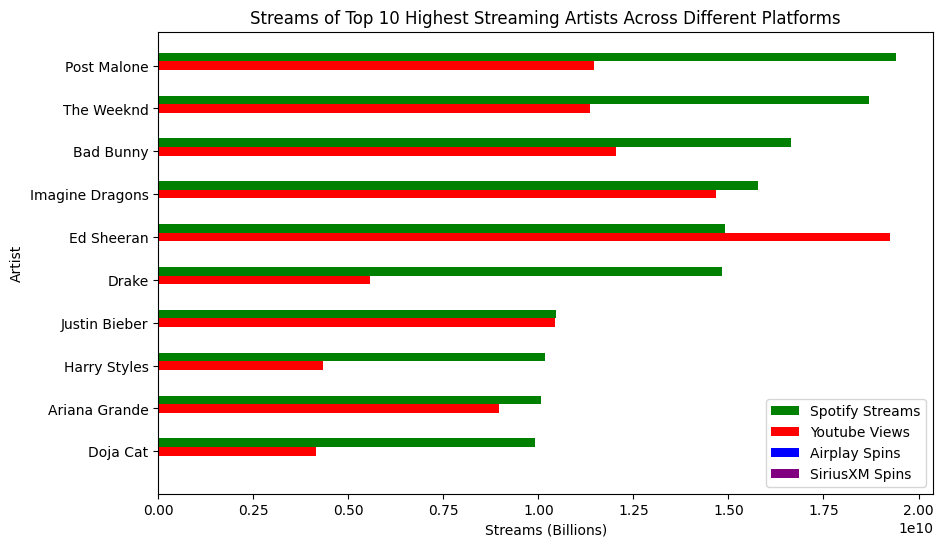

In [24]:
artists = platform_streams.artist
y1 = platform_streams.total_spotify_streams
y2 = platform_streams.total_youtube_views
y3 = platform_streams.total_airplay_spins
y4 = platform_streams.total_siriusxm_spins

bar_height = 0.2

y_positions = np.arange(len(artists))

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y_positions - bar_height, y1, height=bar_height, label='Spotify Streams', color='green')
ax.barh(y_positions, y2, height=bar_height, label='Youtube Views', color='red')
ax.barh(y_positions + bar_height, y3, height=bar_height, label='Airplay Spins', color='Blue')
ax.barh(y_positions + bar_height + bar_height, y4, height=bar_height, label='SiriusXM Spins', color='Purple')

ax.set_xlabel('Streams (Billions)')
ax.set_ylabel('Artist')
ax.set_title('Streams of Top 10 Highest Streaming Artists Across Different Platforms')
# Set the tick locations and labels to the center of each group
ax.set_yticks(y_positions)
ax.set_yticklabels(artists)
ax.legend()

plt.gca().invert_yaxis() #
plt.show()



Our results show that for the most popular artists (on Spotify), spotify streams are significantly larger than radio streams on airplay or SiriusXM. This makes Youtube the closest competitor.

For these top artists, Spotify outperforms streaming on Youtube, with the exception of Ed Sheeran. The next step is to explore artists which are more popular on other streaming platforms (Youtube)

In [20]:
spotify_vs_youtube = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/spotify_vs_youtube.csv')

spotify_vs_youtube.head()

,artist,total_spotify_streams,total_youtube_views,difference
0,Pinkfong,720822868,16322756555,15601933687
1,Luis Fonsi,4395430845,14920591066,10525160221
2,BLACKPINK,4521469986,10480150440,5958680454
3,PSY,746653929,6596203433,5849549504
4,Shakira,3284662968,8741798846,5457135878


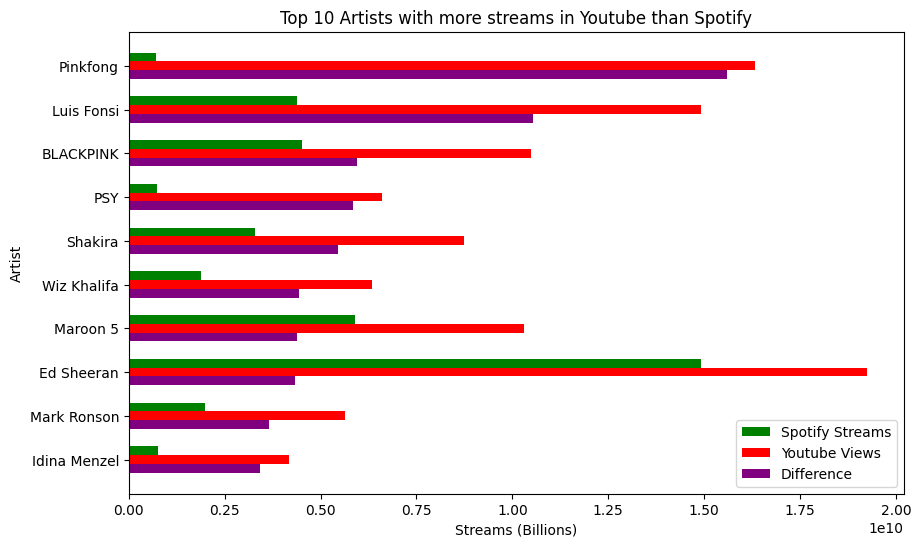

In [25]:
artists = spotify_vs_youtube.artist
y1 = spotify_vs_youtube.total_spotify_streams
y2 = spotify_vs_youtube.total_youtube_views
y3 = spotify_vs_youtube.difference

bar_height = 0.2

y_positions = np.arange(len(artists))

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y_positions - bar_height, y1, height=bar_height, label='Spotify Streams', color='green')
ax.barh(y_positions, y2, height=bar_height, label='Youtube Views', color='red')
ax.barh(y_positions + bar_height, y3, height=bar_height, label='Difference', color='Purple')


ax.set_xlabel('Streams (Billions)')
ax.set_ylabel('Artist')
ax.set_title('Top 10 Artists with more streams in Youtube than Spotify')
# Set the tick locations and labels to the center of each group
ax.set_yticks(y_positions)
ax.set_yticklabels(artists)
ax.legend()

plt.gca().invert_yaxis() #
plt.show()

The top 10 artists with the largest gap between youtube streams and spotify streams have been identified. If Spotify wishes to accumulate more market share (using streams), these identified artists are 'weak points' which needs to be addressed.

Spotify should increase partnerships (e.g. promotions) with these artists to obtain more streams on their platform instead of competitor platforms such as Youtube. Another suggestion is to prioritize adding music videos of these artists to spotify tracks to diminish Youtube's selling point which are visual music videos.

In [29]:
spotify_vs_youtube_top_10 = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/spotify_vs_youtube_top_10.csv')
spotify_vs_youtube_top_10 = spotify_vs_youtube_top_10.sort_values(by='difference', ascending=False)

spotify_vs_youtube_top_10.head(10)

,artist,total_spotify_streams,total_youtube_streams,difference
4,Ed Sheeran,14915963567,19241735782,4325772215
6,Justin Bieber,10470062458,10450068745,-19993713
3,Imagine Dragons,15770756681,14686169319,-1084587362
8,Ariana Grande,10077704169,8970126153,-1107578016
2,Bad Bunny,16645582535,12043510651,-4602071884
9,Doja Cat,9919136034,4162945738,-5756190296
7,Harry Styles,10172423035,4345444824,-5826978211
1,The Weeknd,18701814442,11364659196,-7337155246
0,Post Malone,19414279709,11457733942,-7956545767
5,Drake,14842235606,5582180626,-9260054980


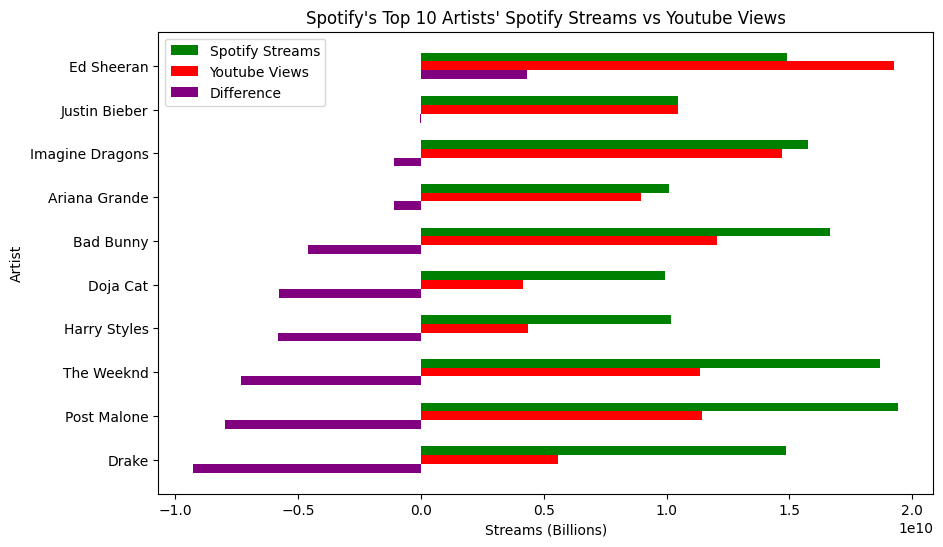

In [33]:
artists = spotify_vs_youtube_top_10.artist
y1 = spotify_vs_youtube_top_10.total_spotify_streams
y2 = spotify_vs_youtube_top_10.total_youtube_streams
y3 = spotify_vs_youtube_top_10.difference

bar_height = 0.2

y_positions = np.arange(len(artists))

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y_positions - bar_height, y1, height=bar_height, label='Spotify Streams', color='green')
ax.barh(y_positions, y2, height=bar_height, label='Youtube Views', color='red')
ax.barh(y_positions + bar_height, y3, height=bar_height, label='Difference', color='Purple')


ax.set_xlabel('Streams (Billions)')
ax.set_ylabel('Artist')
ax.set_title('Spotify\'s Top 10 Artists\' Spotify Streams vs Youtube Views')
# Set the tick locations and labels to the center of each group
ax.set_yticks(y_positions)
ax.set_yticklabels(artists)
ax.legend()

plt.gca().invert_yaxis()
plt.show()

Alternatively, Spotify could capitalize on their popular artists and increase promotional campaigns and partnerships with these artists, to retain their fanbase on Spotify's platform and maintain high exposure and revenue. For conveniencen, the top 10 artists have been re-ordered based on largest to smallest spotify-youtube streaming gap. Partnership strategy should prioritize artists top to bottom, such as starting from Ed Sheeran.

# **Potential New Metrics**

The following section presents potential new metrics which I have created to evaluate different aspects of Spotify's product performance and to better inform strategy

**Stream Share**

First, stream share, calculated by dividing an artist's total streams by the total streams of all songs on Spotify's platform identifies Spotify's strongest products (in terms of artist) while also giving perspective on how much returns they bring.

This can inform budget allocation when partnering with top artists to capitalize from an already strong fanbase. For example, partnerships should prioritize both Harry Styles and Post Malone, but ideally, twice the resources should be going towards promotion Post Malone, given that his streams account for double of Harry Style's.


In [58]:
stream_shares = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/stream_share.csv')

stream_shares.head()

,artist,total_streams,stream_share
0,Others,516706872197,78.5702
1,Post Malone,19414279709,2.9521
2,The Weeknd,18701814442,2.8438
3,Bad Bunny,16645582535,2.5311
4,Imagine Dragons,15770756681,2.3981


/tmp/ipython-input-351531957.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors=plt.cm.get_cmap('tab20').colors,


Text(0.5, 1.0, 'Spotify Streams Share for Top 10 Artists in 2024')

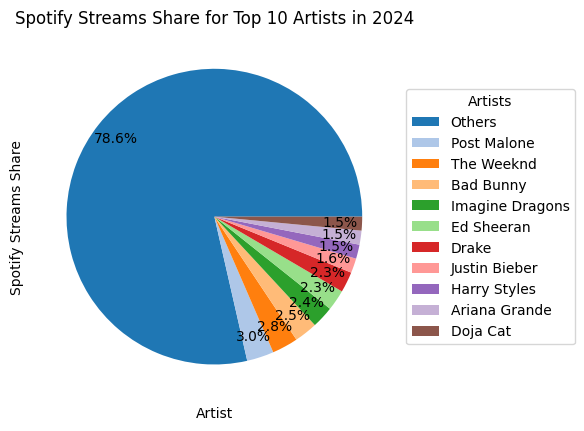

In [61]:
X = stream_shares.artist
Y = stream_shares.stream_share

plt.pie(Y, autopct='%1.1f%%',
        colors=plt.cm.get_cmap('tab20').colors,
        pctdistance=0.85)  # Move percentages inward
plt.legend(X, title="Artists", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel("Artist")
plt.ylabel("Spotify Streams Share")
plt.title("Spotify Streams Share for Top 10 Artists in 2024")

**Spotify Stream-Playlist Ratio**

This metric provides a more accurate and deeper picture into how well a song is received long-term or on a personal level. By dividing streams of a song by the number of playlists it is on, a higher ratio represents that the song is not only popular but also is deeply received by listeners, to the point that it is added to their personal playlist.

This metric is likely to more accurately represent how much listeners like a song along with their purchasing capacity. Merchandise or promotional material related to these top songs are more likely to be given attention by audiences due to a stronger personal connection. Spotify should use these tracks to more effectively capture a customer's attention (e.g. in an advertisement) or partner with these artists to launch the specific-song related products as a more well-liked song often translates to a higher willingness to pay.  

In [41]:
stream_playlist_ratio = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/stream_playlist_ratio.csv')

artists = stream_playlist_ratio.artist
tracks = stream_playlist_ratio.track

stream_playlist_ratio['track_artist'] = stream_playlist_ratio['track'] + ' (by ' + stream_playlist_ratio['artist'] + ')'

stream_playlist_ratio.head()

,artist,track,stream_playlist_ratio,track_artist
0,Olivia Rodrigo,vampire,189357.75,vampire (by Olivia Rodrigo)
1,Jung Kook,Seven (feat. Latto) (Clean Ver.),105500.67,Seven (feat. Latto) (Clean Ver.) (by Jung Kook)
2,DJ Snake,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",41507.63,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B..."
3,Taylor Swift,Down Bad,40622.87,Down Bad (by Taylor Swift)
4,TREASURE,KING KONG,39025.43,KING KONG (by TREASURE)


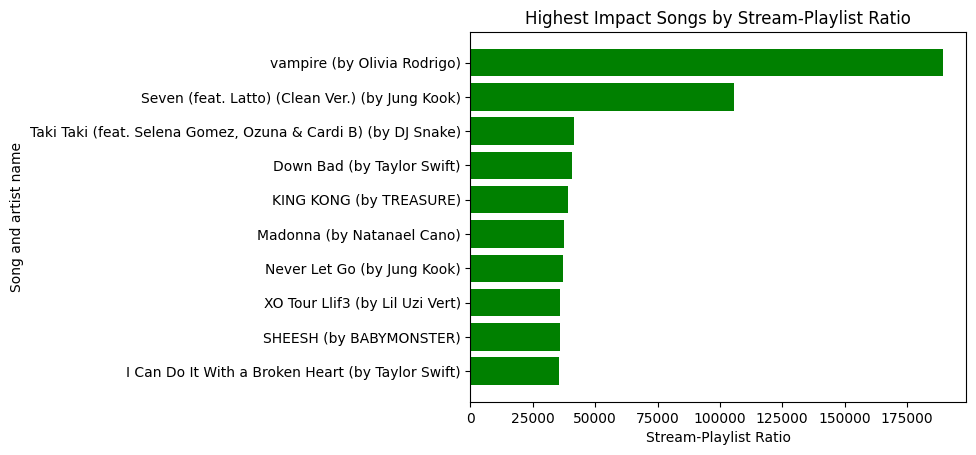

In [44]:
X = stream_playlist_ratio.track_artist
Y = stream_playlist_ratio.stream_playlist_ratio

plt.barh(X, Y, color='green')
plt.title("Highest Impact Songs by Stream-Playlist Ratio")
plt.xlabel("Stream-Playlist Ratio")
plt.ylabel("Song and artist name")

plt.gca().invert_yaxis()
plt.show()


**New Songs Introduced (Shazam)**

This metric can gauge curiosity and predict trends in customer sentiment towards songs from specific time periods. The act of using Shazam to identify a song indicates that the song is unknown to the user but has also captured their interest.

Our data shows that songs from 2011 and 2015 have received the most interest. Spotify could establish an early advantage by promoting songs from this time period to capitalize on growing interest, or use this information to prioritize songs that will effectively impress the audience in product areas such as algorithm recommendations and Spotify Wrapped.

In [36]:
new_songs_introduced = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/average_shazam.csv')

new_songs_introduced.head()

,release_year,average_shazam_counts
0,2010,1.001162e+07
1,2011,2.211550e+07
2,2012,1.369336e+07
3,2013,1.128700e+07
4,2014,1.185134e+07


Text(0.5, 1.0, 'Average shazam counts by song release year')

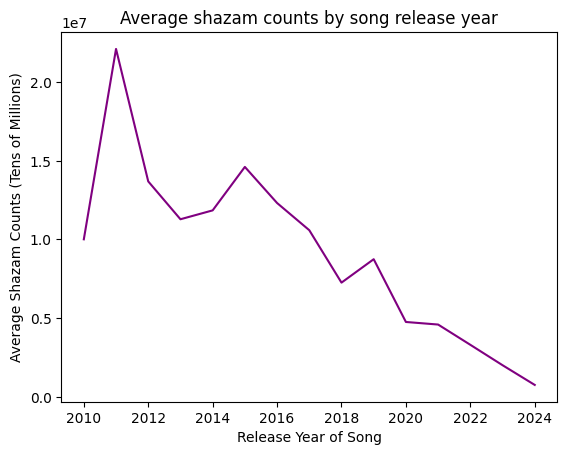

In [46]:
X = new_songs_introduced.release_year
Y = new_songs_introduced.average_shazam_counts

plt.plot(X, Y, color = "purple")
plt.xlabel("Release Year of Song")
plt.ylabel("Average Shazam Counts (Tens of Millions)")
plt.title("Average shazam counts by song release year")

Highest Streaming Albums in 2024

This metric identifies albums released in the recent year which has received the most streams. This is relevant in identifying artists that are likely to go on tour following their success with the recent album. Spotify should partner with these artists for concert-related campaigns to obtain customer support following excitement with the released album. An example could be awarding tickets to top x listeners of the album which would boost streams on Spotify's platform.

In [62]:
top_albums = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/top_10_albums.csv')

top_albums['artist_album'] = top_albums['artist'] + ' (' + top_albums['album_name'] + ')'

top_albums.head()

,artist,album_name,total_streams,artist_album
0,Billie Eilish,HIT ME HARD AND SOFT,1099817805,Billie Eilish (HIT ME HARD AND SOFT)
1,Taylor Swift,THE TORTURED POETS DEPARTMENT,1022417648,Taylor Swift (THE TORTURED POETS DEPARTMENT)
2,Benson Boone,Beautiful Things,900158751,Benson Boone (Beautiful Things)
3,Ariana Grande,eternal sunshine,766404654,Ariana Grande (eternal sunshine)
4,FloyyMenor,Gata Only,675079153,FloyyMenor (Gata Only)


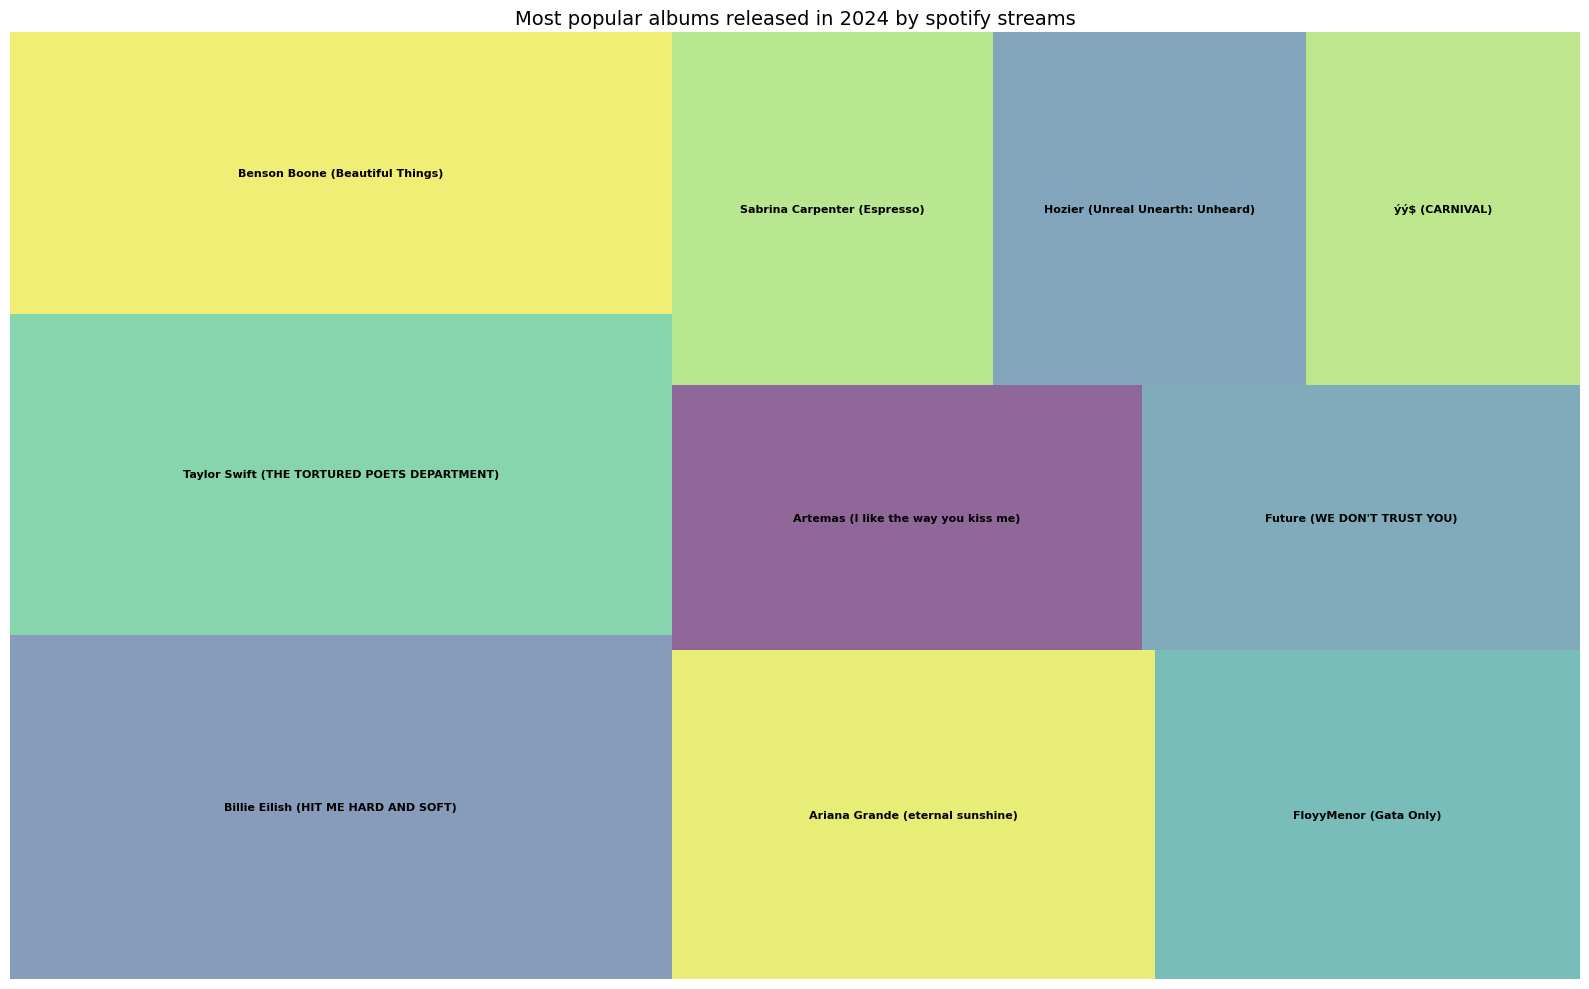

In [65]:
plt.figure(figsize=(16, 10))

sizes = top_albums.total_streams
labels = top_albums.artist_album

squarify.plot(sizes=sizes,
              label=labels,
              alpha=0.6,
              text_kwargs={'fontsize': 8, 'weight': 'bold'})  # Larger font

plt.title("Most popular albums released in 2024 by spotify streams", fontsize=14)
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.show()

# **Exploratory Analysis**

Top 10 Songs (Up to 2024)

In [ ]:
top_10_songs = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/spotify_top_10.csv')

top_10_songs.head()

,track,artist,release_date_cleaned,spotify_streams_cleaned
0,Blinding Lights,The Weeknd,2019-11-29,4281468720
1,Shape of You,Ed Sheeran,2017-01-06,3909458734
2,Someone You Loved,Lewis Capaldi,2018-11-08,3427498835
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018-10-18,3358704125
4,As It Was,Harry Styles,2022-03-31,3301814535


Text(0, 0.5, 'Song names')

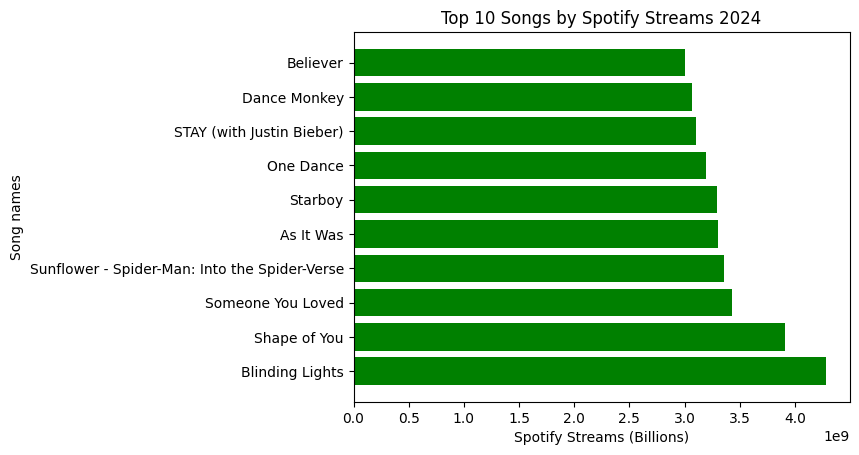

In [ ]:
X = top_10_songs.track
Y = top_10_songs.spotify_streams_cleaned

plt.barh(X, Y, color='green')
plt.title("Top 10 Songs by Spotify Streams 2024")
plt.xlabel("Spotify Streams (Billions)")
plt.ylabel("Song names")

Top 10 Songs (Up to 2024) No Explicit



In [ ]:
top_10_songs_clean = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/spotify_top_10_clean.csv')

top_10_songs_clean.head()

,track,artist,release_date_cleaned,spotify_streams_cleaned
0,Blinding Lights,The Weeknd,2019-11-29,4281468720
1,Shape of You,Ed Sheeran,2017-01-06,3909458734
2,Someone You Loved,Lewis Capaldi,2018-11-08,3427498835
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018-10-18,3358704125
4,As It Was,Harry Styles,2022-03-31,3301814535


Text(0, 0.5, 'Song names')

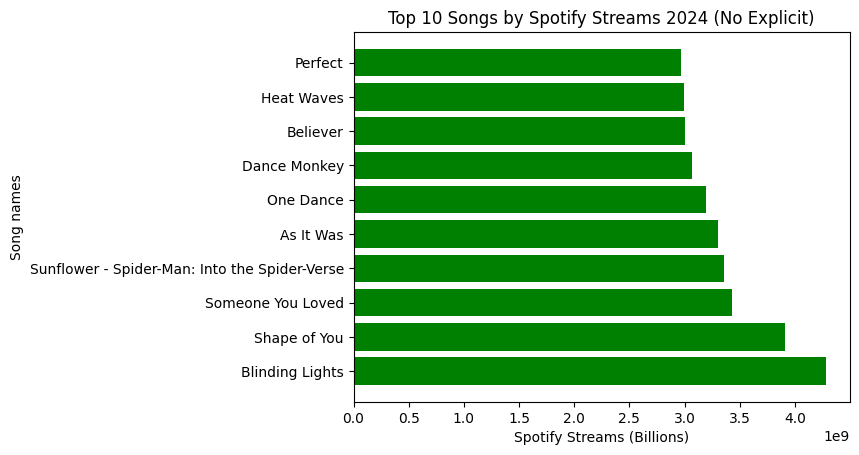

In [ ]:
X = top_10_songs_clean.track
Y = top_10_songs_clean.spotify_streams_cleaned

plt.barh(X, Y, color='green')
plt.title("Top 10 Songs by Spotify Streams 2024 (No Explicit)")
plt.xlabel("Spotify Streams (Billions)")
plt.ylabel("Song names")

Most popular artists based on total streams

In [ ]:
top_10_artists = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/top_10_artists.csv')

top_10_artists.head()

,artist,total_streams
0,Post Malone,19414279709
1,The Weeknd,18701814442
2,Bad Bunny,16645582535
3,Imagine Dragons,15770756681
4,Ed Sheeran,14915963567


Text(0.5, 1.0, 'Top 10 Artists in 2024 based on total spotify streams')

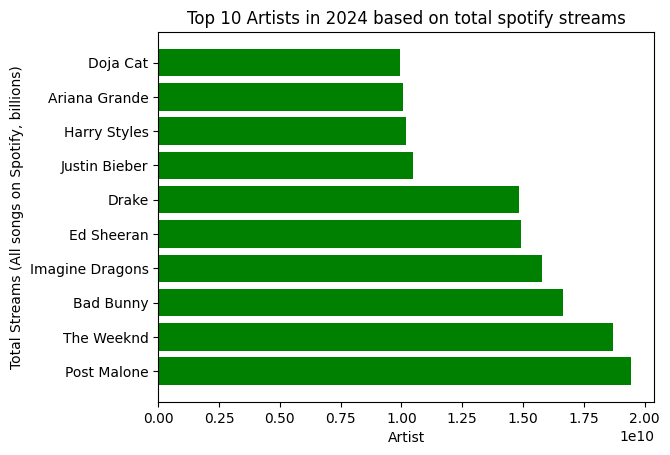

In [ ]:
X = top_10_artists.artist
Y = top_10_artists.total_streams

plt.barh(X, Y, color = 'green')
plt.xlabel("Artist")
plt.ylabel("Total Streams (All songs on Spotify, billions)")
plt.title("Top 10 Artists in 2024 based on total spotify streams")

Ariana Grande

In [ ]:
ari_top_10_songs = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/ari_top_10.csv')

ari_top_10_songs.head()

,track,artist,release_date_cleaned,spotify_streams_cleaned,spotify_playlist_count,all_time_rank,apple_music_playlist_count
0,7 rings,Ariana Grande,2019-01-18,2262490403,"179,865",274,220
1,"thank u, next",Ariana Grande,2018-11-03,1878196824,"134,913",515,238
2,positions,Ariana Grande,2020-10-23,1432830108,"139,215",368,283
3,Side To Side,Ariana Grande,2016-04-01,1427792654,"120,921",680,128
4,no tears left to cry,Ariana Grande,2018-04-20,1331371819,"100,503",923,143


Text(0, 0.5, 'Song names')

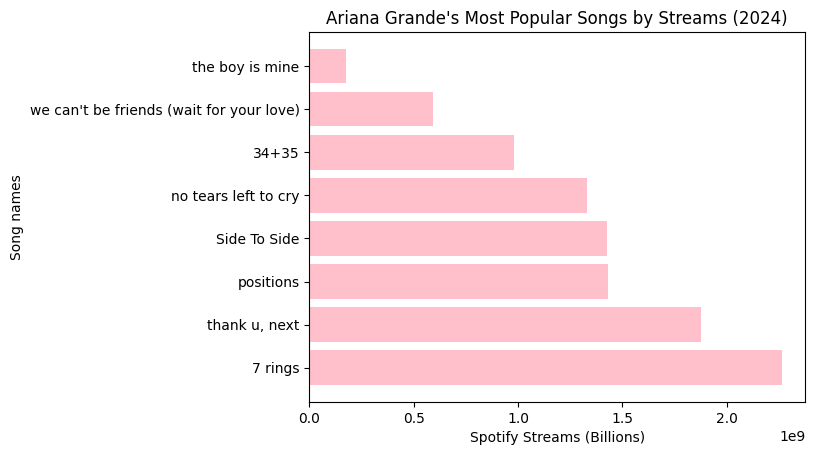

In [ ]:
X = ari_top_10_songs.track
Y = ari_top_10_songs.spotify_streams_cleaned

plt.barh(X, Y, color='pink')
plt.title("Ariana Grande's Most Popular Songs by Streams (2024)")
plt.xlabel("Spotify Streams (Billions)")
plt.ylabel("Song names")

In [ ]:
ag_yearly_performance = pd.read_csv('/content/drive/My Drive/DataScience_Projects/spotify_data_project/ari_yearly_performance.csv')

ag_yearly_performance.head()

,release_year,average_streams
0,2016,1.427793e+09
1,2018,1.604784e+09
2,2019,2.262490e+09
3,2020,1.205724e+09
4,2024,3.832023e+08


Text(0.5, 1.0, 'Average spotify streams of Ariana Grande songs by release year')

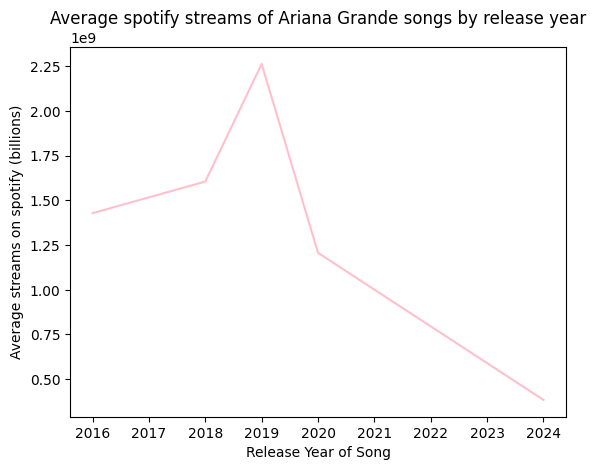

In [ ]:
X = ag_yearly_performance.release_year
Y = ag_yearly_performance.average_streams

plt.plot(X, Y, color = "pink")
plt.xlabel("Release Year of Song")
plt.ylabel("Average streams on spotify (billions)")
plt.title("Average spotify streams of Ariana Grande songs by release year")